
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Alisha Fernandes
2. Haritha Maheshkumar

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

Answer: 

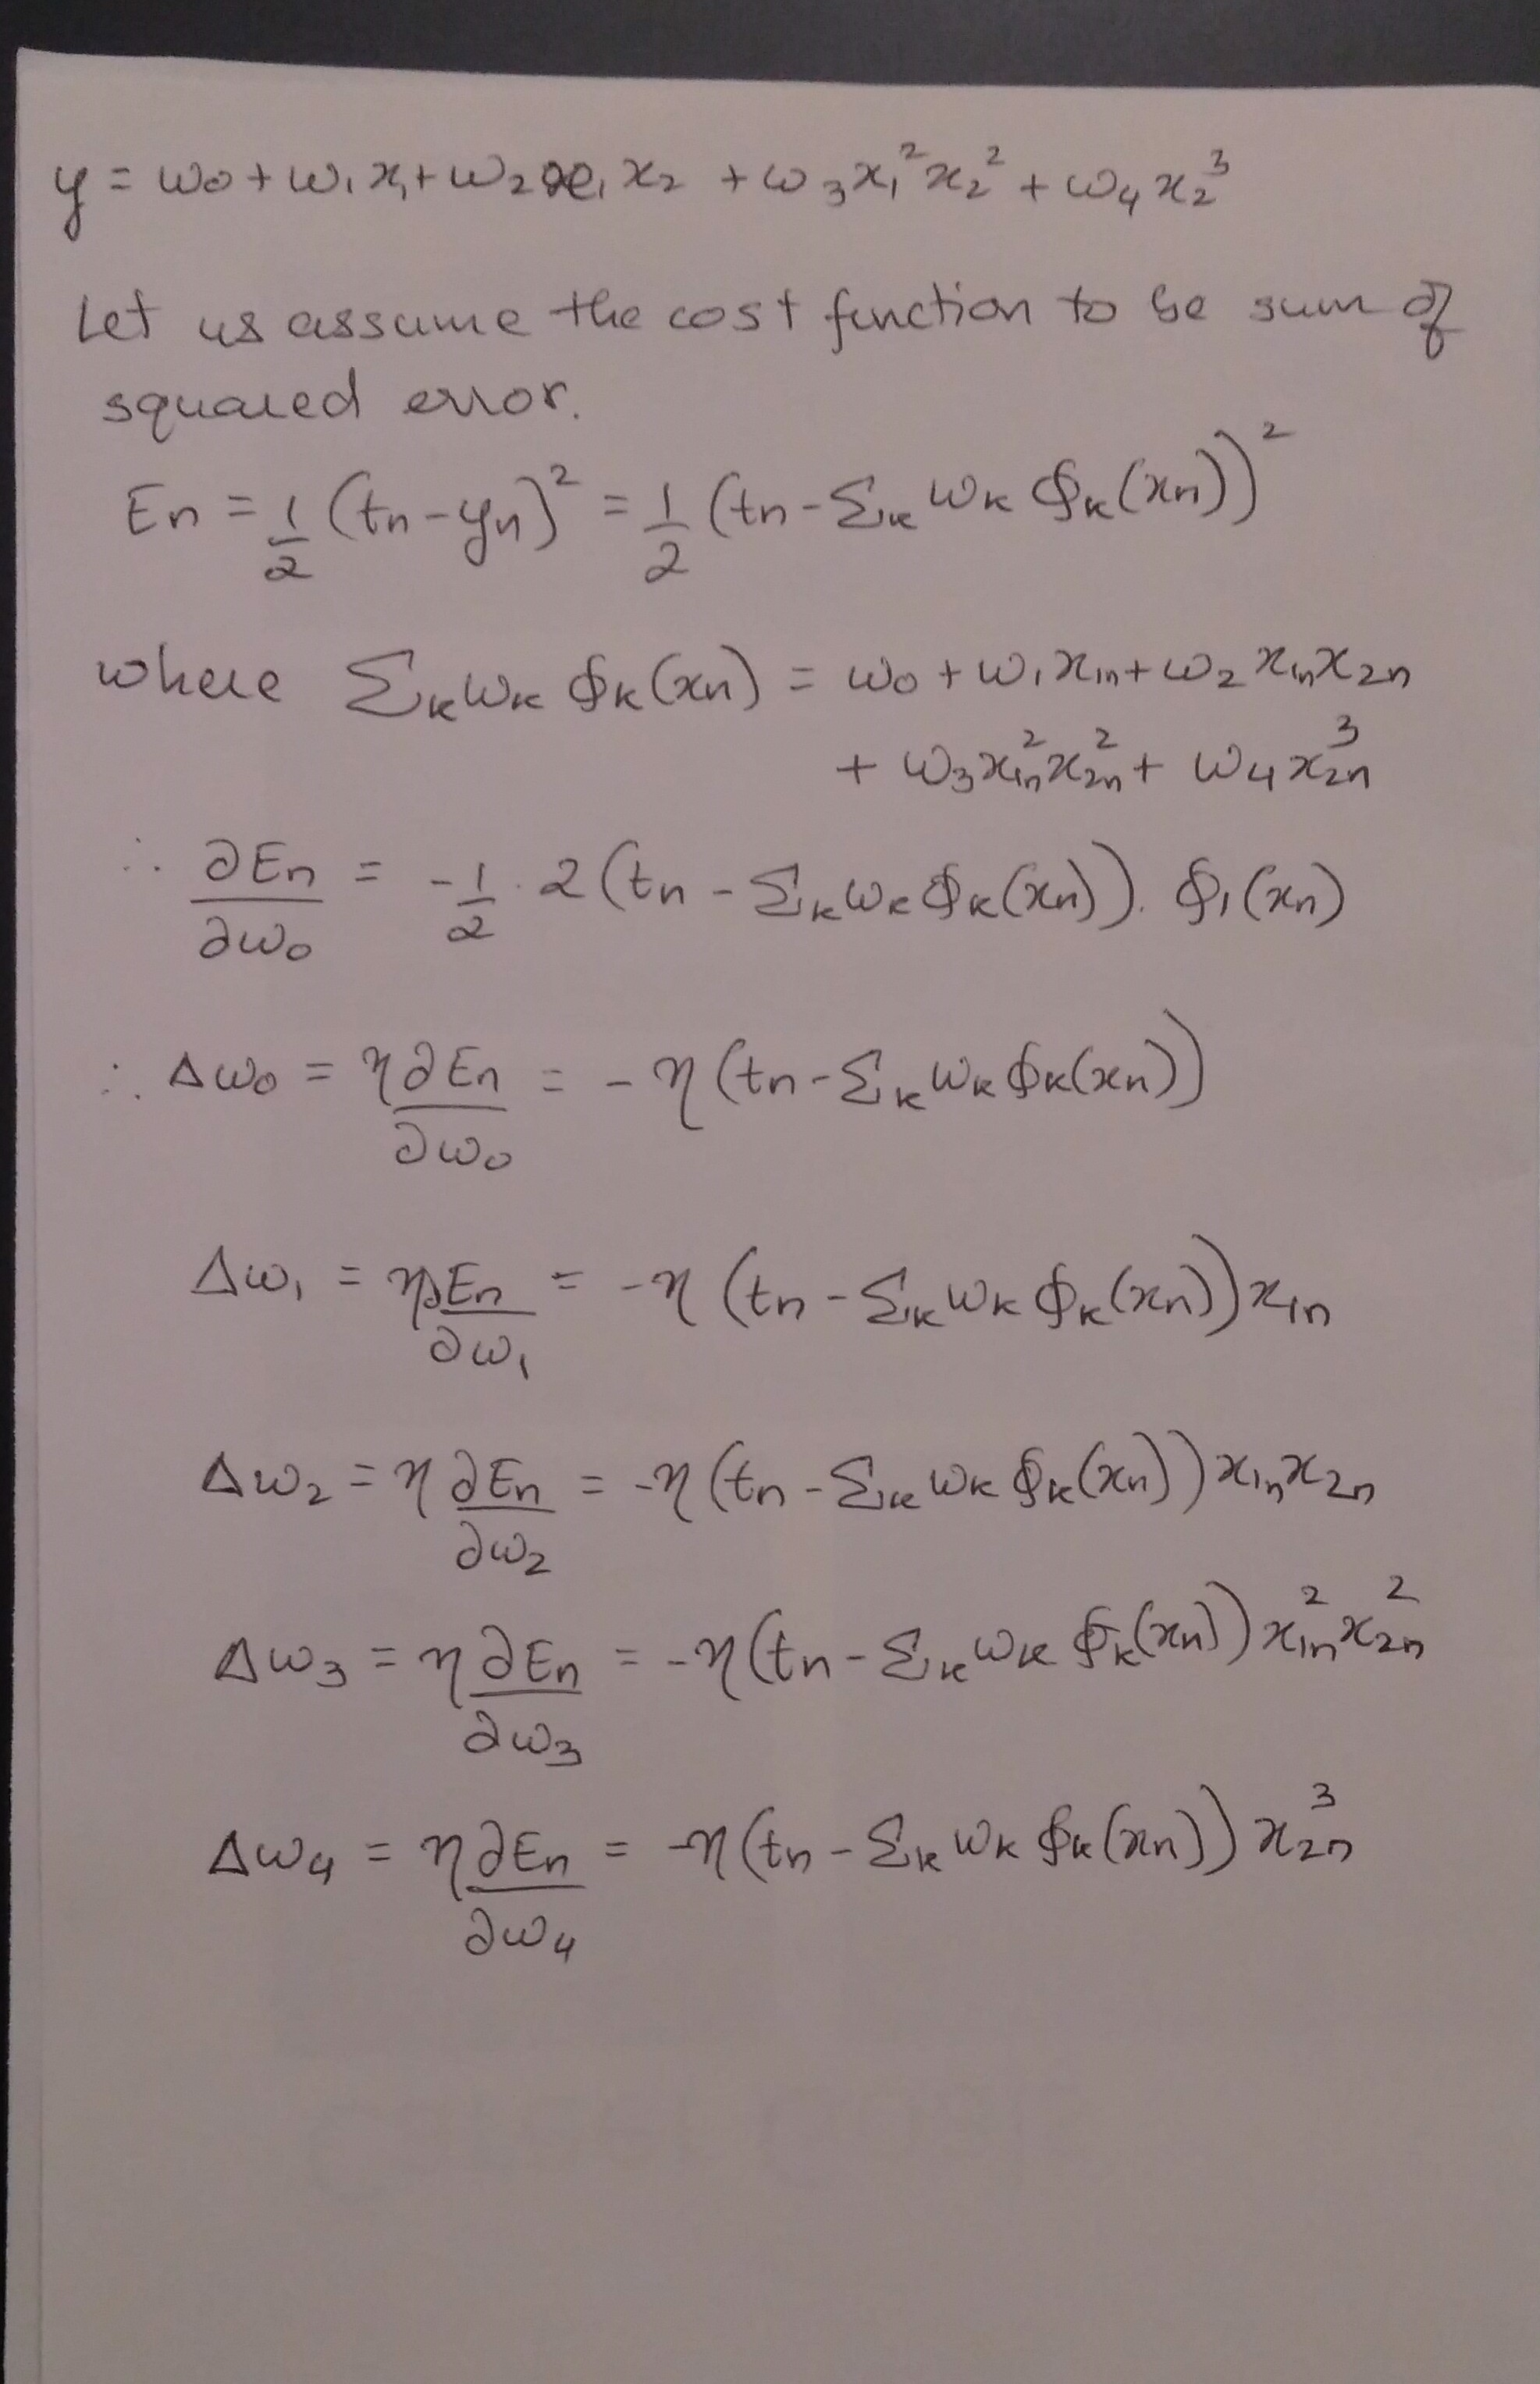

In [6]:
from IPython.display import Image
Image("Q1-1.jpg")

### 2.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

class LinearRegressionSGD:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum
        self.vel = np.zeros(5) # used as velocity in momentum


        
    def sgd(self, gradient):
        '''updates self.coef based on gradient using SGD'''
        self.coef = self.coef - self.learning_rate*(gradient + (self.regularization*self.coef))
        return self.coef
    
    def adagrad(self, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        self.cache = self.cache + (gradient + (self.regularization*self.coef))**2
        self.coef = self.coef - self.learning_rate*(gradient + (self.regularization*self.coef))/(np.sqrt(self.cache + self.eps))
        return self.coef
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.vel = self.mu*self.vel - self.learning_rate*(gradient + (self.regularization*self.coef))
        self.coef = self.coef + self.vel
        return self.coef

    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        X_features = self.get_features(X)
        df = pd.DataFrame(columns=['epoch','beta','x1','X1X2','X_1^2X_2^2','X_2^3','MSE'])
        for epoch in range(self.n_epoch):  
            coeff = self.coef
            
            for i, row in enumerate(X_features):
                coeff = self.coef
                prediction = self.linearPredict(row)
                error = prediction - y[i]
                gradient = error*row
                if update_rule == 'sgd_momentum':
                    self.coef = self.sgd_momentum(gradient)
                elif update_rule == 'adagrad':
                    self.coef = self.adagrad(gradient)
                else:
                    self.coef = self.sgd(gradient)
                
            yhat = self.linearPredict(X_features)
            MSE = np.mean((y - yhat)**2, dtype=np.float64)
            df = df.append({'epoch': epoch, 'beta':coeff[0], 'x1' : coeff[1], 'X1X2': coeff[2] ,'X_1^2X_2^2': coeff[3],
            'X_2^3': coeff[4],'MSE': MSE},ignore_index=True)
        
        df_=df
        if plot == True:
            fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,sharey=False, figsize=(11,4))
            ax1.scatter(x=df_['epoch'],y=df_['MSE'])
            ax2.scatter(x=df_['epoch'],y=df_['beta'], label = 'w0')
            ax2.scatter(x=df_['epoch'],y=df_['x1'], label = 'w1')
            ax2.scatter(x=df_['epoch'],y=df_['X1X2'], label = 'w2')
            ax2.scatter(x=df_['epoch'],y=df_['X_1^2X_2^2'], label = 'w3')
            ax2.scatter(x=df_['epoch'],y=df_['X_2^3'], label = 'w4')
            ax1.set_title('MSE vs Epoch')
            ax2.set_title('Coefficient vs Epoch')
            ax1.set_xlabel('Epoch')
            ax2.set_xlabel('Epoch')
            ax1.set_ylabel('MSE')
            ax2.set_ylabel('Coefficient')
            ax2.legend()
            
        return df

    def get_features(self, X):
        '''
       X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
       It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
        '''
        X_features = pd.DataFrame(X, columns = ['x1','x2'])
        X_features['beta']=1
        X_features['X1X2']=X_features['x1']*X_features['x2']
        X_features['X_1^2X_2^2'] = X_features['x1']*X_features['x2']*X_features['x1']*X_features['x2']
        X_features['X_2^3'] = X_features['x2']*X_features['x2']*X_features['x2']
        X_features = X_features.drop('x2',1)
        X_features = np.array(X_features[['beta','x1','X1X2','X_1^2X_2^2','X_2^3']], dtype=np.float64)
        return X_features
        
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        coef_transpose = np.transpose(self.coef)
#        yhat = np.matmul(np.array(X_features), self.coef, dtype=np.float64)
        yhat = np.dot(X_features, coef_transpose)
        return yhat

In [2]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


In [3]:
df = pd.DataFrame(columns=['regularization','learning_rate','MSE'])
for i, reg in enumerate(regularization):
    for j, learn in enumerate(learning_rate):
        model = LinearRegressionSGD(learn, reg, n_epochs)
        fit = model.fit(X,y)
        X_features = model.get_features(X)
        predict = model.linearPredict(X_features)
        MSE = np.mean((y - predict)**2)
        df = df.append({'regularization': reg, 'learning_rate':learn, 'MSE': MSE},ignore_index=True)

df.sort_values('MSE')[0:2]

C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in square
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in add


,regularization,learning_rate,MSE
2,0.0,0.001,0.020878
3,0.0,0.010,0.021782


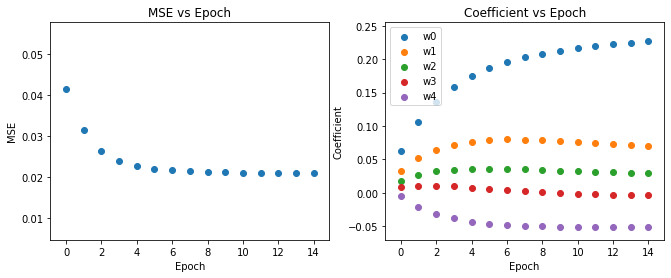

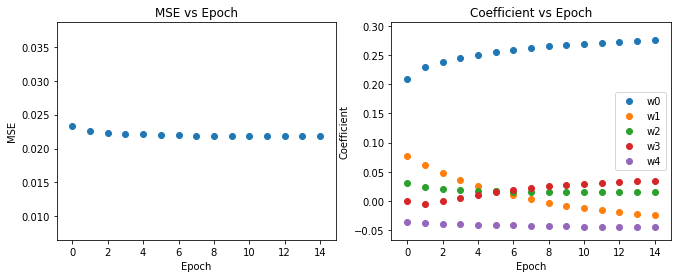

In [8]:
SGD1 = LinearRegressionSGD(0.001, 0, n_epochs)
fit = SGD1.fit(X,y, plot=True)
SGD2 = LinearRegressionSGD(0.010, 0, n_epochs)
fit = SGD2.fit(X,y, plot=True)

### Using SGD-Momentum

In [5]:
df2 = pd.DataFrame(columns=['regularization','learning_rate','MSE'])
for i, reg in enumerate(regularization):
    for j, learn in enumerate(learning_rate):
        model = LinearRegressionSGD(learn, reg, n_epochs)
        fit = model.fit(X,y, update_rule = 'sgd_momentum')
        X_features = model.get_features(X)
        predict = model.linearPredict(X_features)
        MSE = np.mean((y - predict)**2)
        df2 = df2.append({'regularization': reg, 'learning_rate':learn, 'MSE': MSE},ignore_index=True)

df2.sort_values('MSE')[0:2]

C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in square
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in subtract
C:\Users\alish\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in add


,regularization,learning_rate,MSE
1,0.0,0.0010,0.020264
0,0.0,0.0001,0.020870


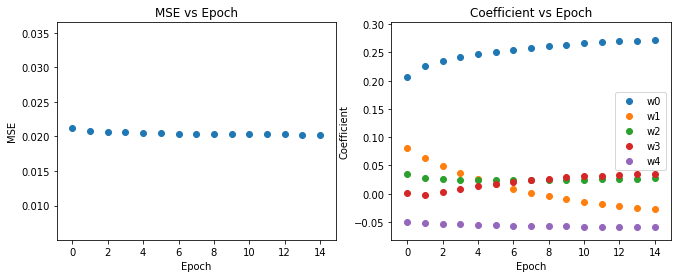

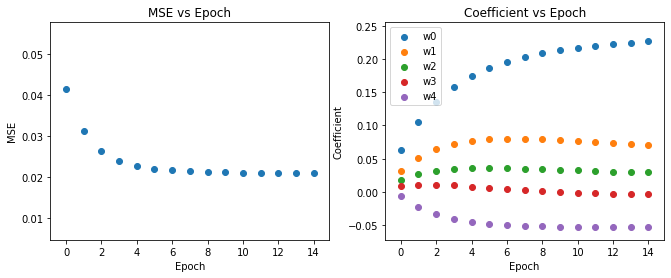

In [9]:
SGD_Momentum1 = LinearRegressionSGD(0.001, 0, n_epochs)
fit = SGD_Momentum1.fit(X,y, update_rule = 'sgd_momentum', plot=True)
SGD_Momentum2 = LinearRegressionSGD(0.0001, 0, n_epochs)
fit = SGD_Momentum2.fit(X,y, update_rule = 'sgd_momentum', plot=True)

### Using Adagrad

In [3]:
df2 = pd.DataFrame(columns=['regularization','learning_rate','MSE'])
for i, reg in enumerate(regularization):
    for j, learn in enumerate(learning_rate):
        model = LinearRegressionSGD(learn, reg, n_epochs)
        fit = model.fit(X,y, update_rule = 'adagrad')
        X_features = model.get_features(X)
        predict = model.linearPredict(X_features)
        MSE = np.mean((y - predict)**2)
        df2 = df2.append({'regularization': reg, 'learning_rate':learn, 'MSE': MSE},ignore_index=True)

df2.sort_values('MSE')[0:2]

,regularization,learning_rate,MSE
4,0.0,0.10,0.020235
3,0.0,0.01,0.021013


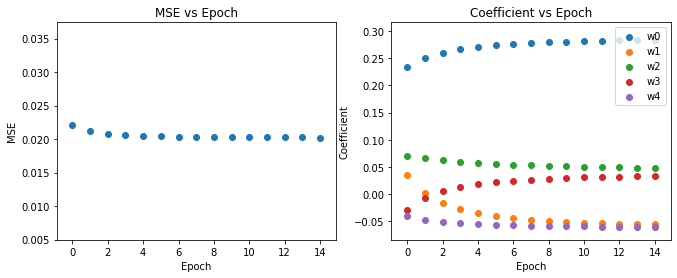

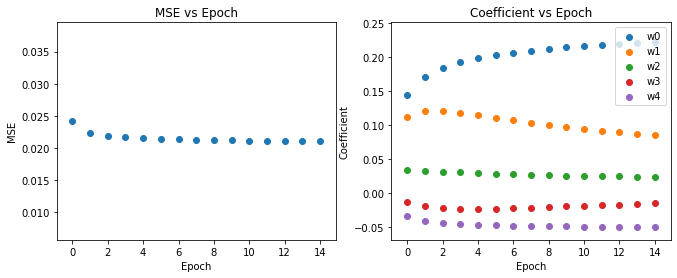

In [4]:
SGD_Momentum1 = LinearRegressionSGD(0.1, 0, n_epochs)
fit = SGD_Momentum1.fit(X,y, update_rule = 'adagrad', plot=True)
SGD_Momentum2 = LinearRegressionSGD(0.01, 0, n_epochs)
fit = SGD_Momentum2.fit(X,y, update_rule = 'adagrad', plot=True)

### 3.

Ans.  
Based on the results obtained, the adagrad update rule allows for a higher learning rate. This is because it adjusts the learning rate based on the parameters. Adagrad modifies the  learning rate at each step for every parameter based on the previously computed gradients.


# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 
tanh function: Test loss = 0.477, Train loss = 0.335; linear function: Test loss = 0.475, Train loss = 0.471

Linear - The decision boundary is just a straight line function, where activation is proportional to input. Since the hidden layer is also a linear function, it serves no purpose: The final activation function is a linear function of the input of the first layer. 

Tanh - Since the tanh function is non-linear (a scaled version of the sigmoid function), the hidden layer can be stacked up, giving rise to possibilities of non-linear activation functions.   

However, the Tanh function doesn't seem to do much in improving the accuracy of classification in this case. It overfits the training data, and performs only as good as the linear function, in the test data 



### 2. 

No.Neurons = 2: Test loss = 0.458, Train loss = 0.431; No.Neurons = 4: Test loss = 0.449, Train loss = 0.435; No.Neurons = 8: Test loss = 0.323, Train loss = 0.273

As the number of neurons increases, the number of activation functions increase, giving rise to more number of non-linear activations. The complexity of the function is better captured with increased neurons / functions, leading to lower test errors (from 0.458 in 2-neuron network to 0.323 in 8-neuron network)


### 3.

Learning rate = 3:
1000 epoch - Test loss: 0.659, Train loss: 0.552; 100 epoch - Test loss: 0.568, Train loss: 0.563

Learning rate = 0.3:
1000 epoch - Test loss: 0.527, Train loss: 0.392; 100 epoch - Test loss: 0.542, Train loss: 0.433

Learning rate = 0.03:
1000 epoch - Test loss: 0.439, Train loss: 0.374; 100 epoch - Test loss: 0.510, Train loss: 0.448

Learning rate = 0.003:
1000 epoch - Test loss: 0.474, Train loss: 0.465; 100 epoch - Test loss: 0.519, Train loss: 0.469


As the learning rate decreases from 3 to 0.003, the loss function for both train and datasets (1) Tends to get smoother: Indicating that the variation in error estimates with increasing # epochs reduces (2) Decreases in magnitude: This happens only till learning rate = 0.03. When it is further reduced to 0.003, the magnitude of the error increases again. This can be explained by the optimal learning rating lying in between a too high 3 (possibilities of divergence) and a too low 0.003 (slow convergence). This pattern is observed across both the 1000 epoch and 100 epoch iterations


### 4.

2 Hidden Layers: 
Test loss: 0.378, Train loss: 0.063

1 Hidden Layer: 
Test loss: 0.481, Train loss: 0.315

The additional layer and the increased number of neurons in first layer, increase the complexity of the network giving rise to more non-linear activations which can in turn capture the complexity of the function better. This can be observed while comparing the test errors - The 2-layer neural network has a significantly lower test error when compared to the single-layered one.  

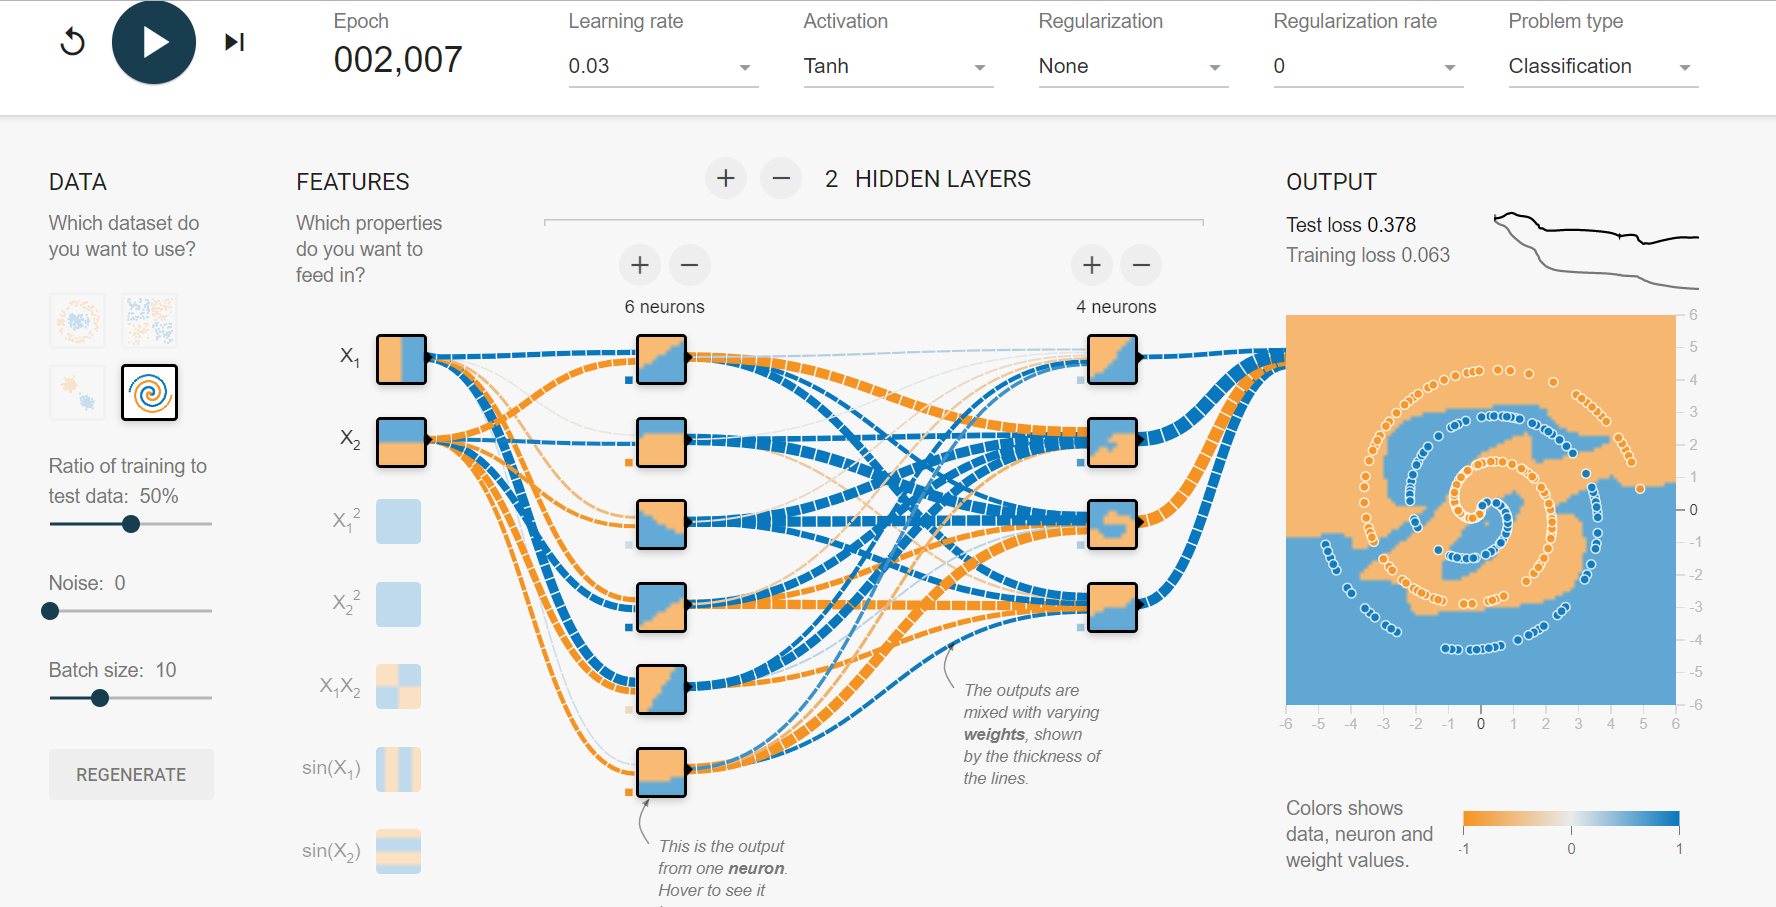

In [5]:
#PART 2
from IPython.display import Image
Image("q2_4.png")

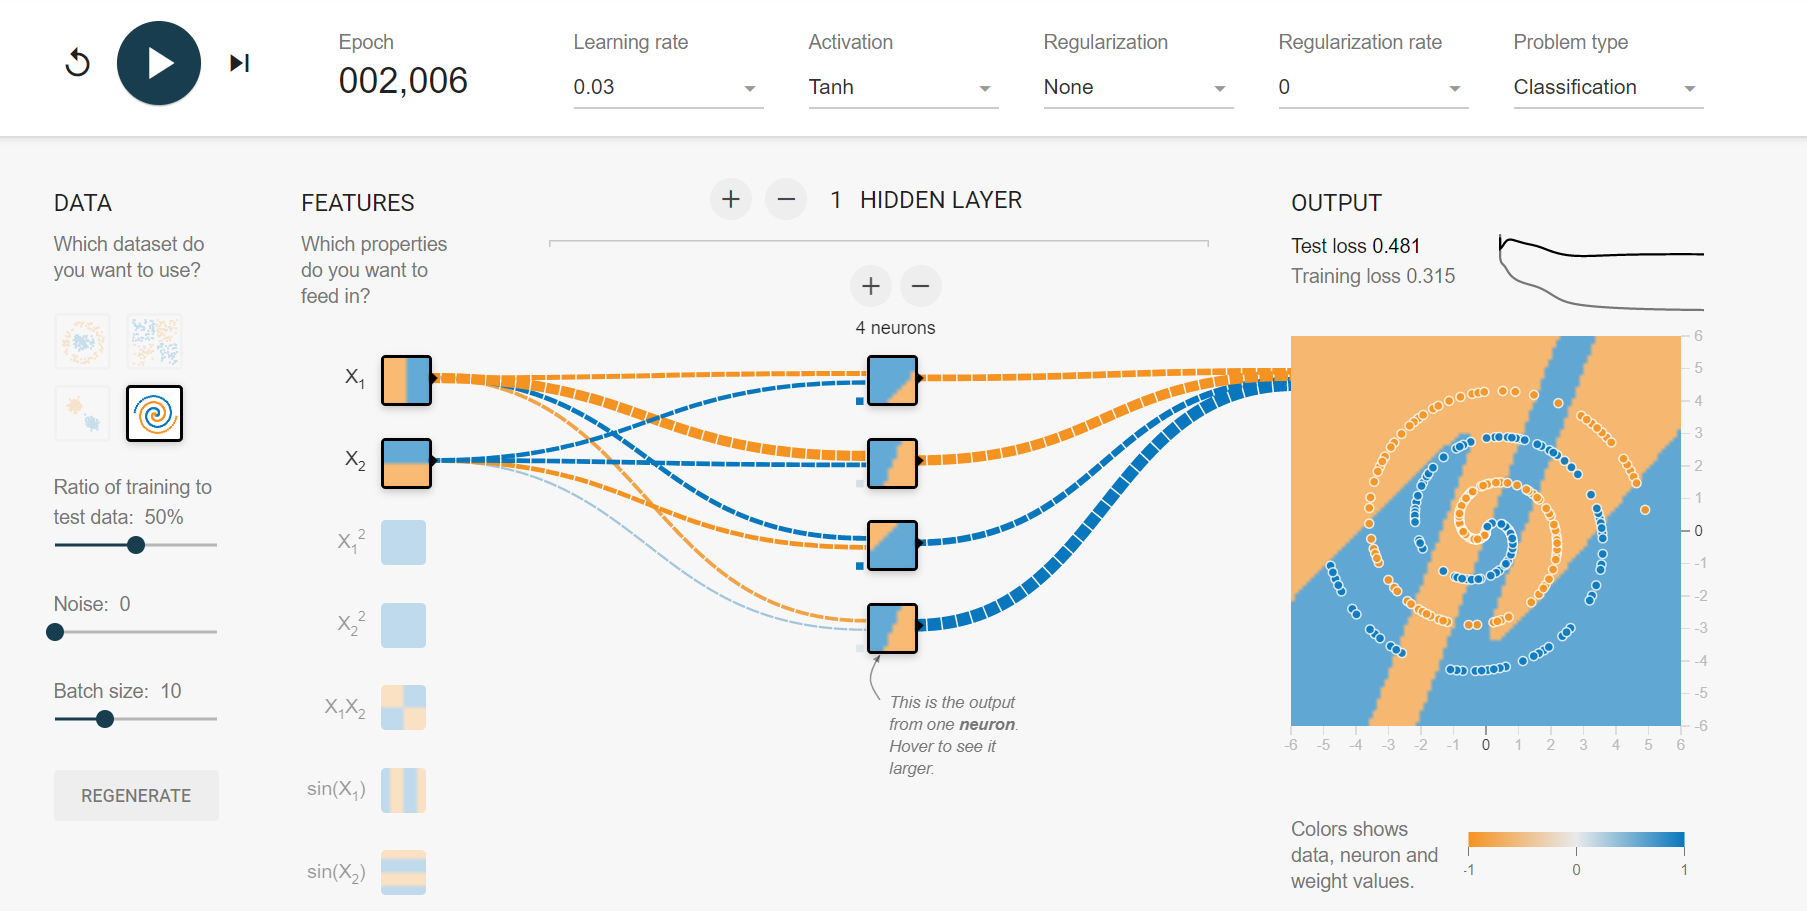

In [6]:
from IPython.display import Image
Image("q2_5.png")

### 5.

From the previous set of exercises, we had 2 findings --> 1. 2 hidden layer neural network is better than a single layer network 2. 0.03 is the optimal learning rate in the 3 to 0.003 range. Thus, both of these have been retained as learnings. 

From experimentation with linear and tanh, we saw that the tanh function is non-linear and that it performed slightly better. Hence, to use non-linear activation functions AND non-linear combination of functions, we tried ReLu. 

Also, since we have increased the number of neurons, ReLu could also allow for partial activation of neurons, making the network lighter. x1 squared and x2 squared were chosen as additional inputs in addition to the original inputs to allow for easier derivatives of quadratic functions. This led to a test loss of 0.004 and a train loss of 0.008. The epochs count was also limited to 409 as there wasn't much change/decrease in the test loss beyond that point.  

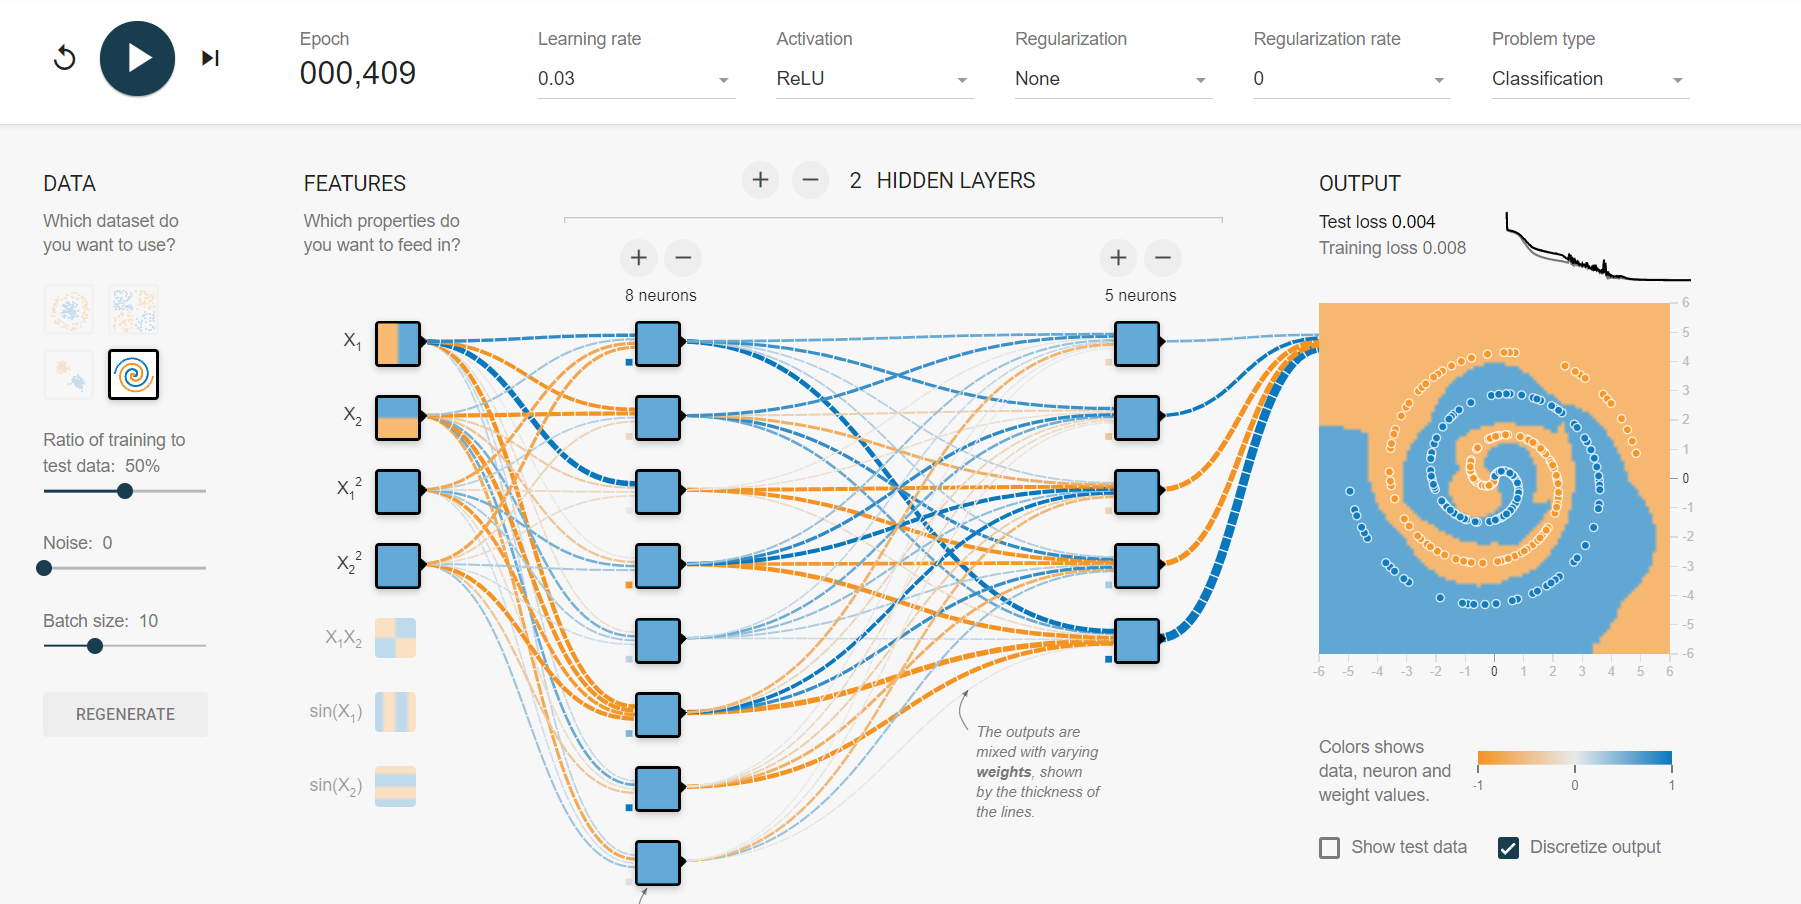

In [2]:
from IPython.display import Image
Image("q5.png")

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [7]:
## read data
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [8]:
## create train/test split
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)
clf =  tree.DecisionTreeClassifier()
model = clf.fit(x_train, y_train)
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
print ('The train accuracy is ' + str(metrics.accuracy_score(y_train, prediction_train)))
print ('The test accuracy is ' + str(metrics.accuracy_score(y_test, prediction_test)))

The train accuracy is 1.0
The test accuracy is 0.9473684210526315


In [9]:
## save tree as .dot
with open("file_name.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

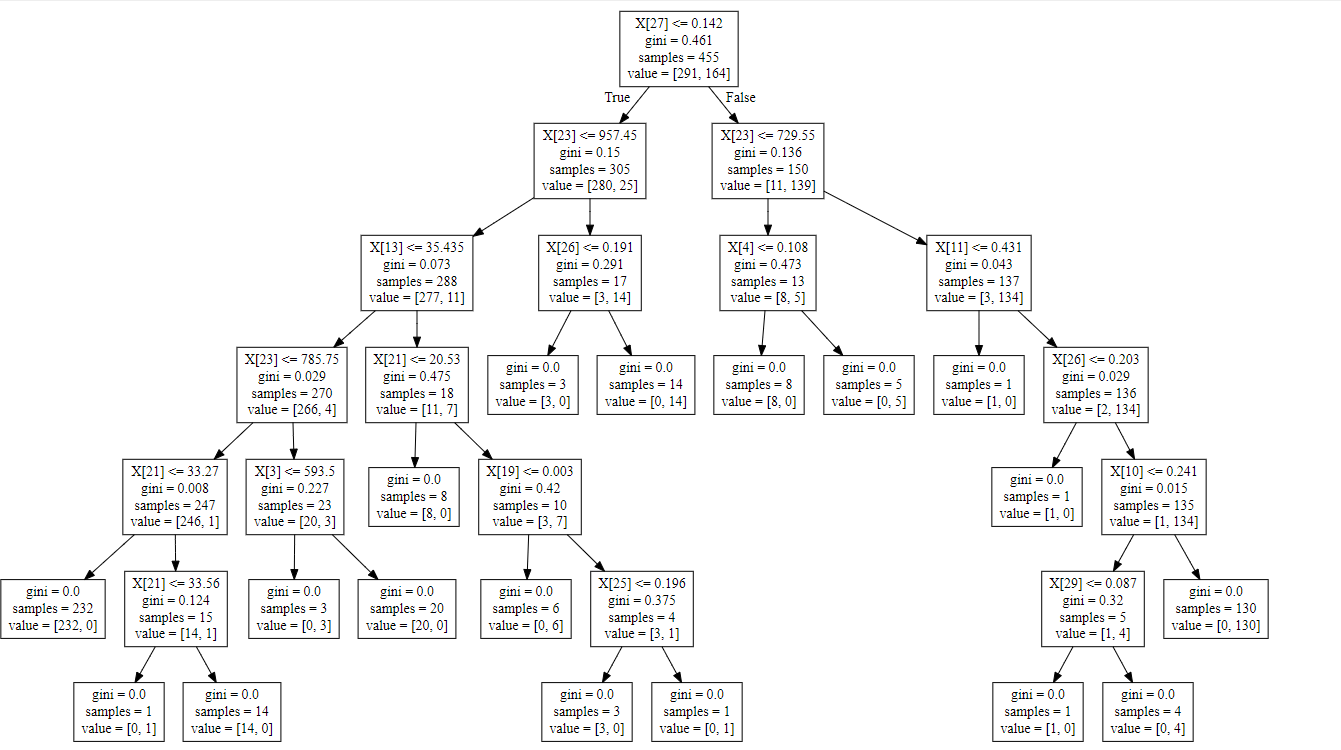

In [10]:
from IPython.display import Image
Image("Q3-1.png")

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

In [45]:
max_depth = list(range(1,21))
min_samples_split = [2 ** (n) for n in range(1, 16)]
criteria = ['gini', 'entropy']

def best_classification(criteria):
    df3 = pd.DataFrame(columns=['max_depth','min_sample_split','train_accuracy','test_accuracy'])
    for maxx in range(1,21):
        for j, minn in enumerate(min_samples_split):
            #print(maxx,minn)
            clf = tree.DecisionTreeClassifier(max_depth = maxx, min_samples_split = minn, criterion=criteria,random_state=0)
            model = clf.fit(x_train, y_train)
            prediction_train = model.predict(x_train)
            prediction_test = model.predict(x_test)
            train_accuracy = metrics.accuracy_score(y_train, prediction_train)
            test_accuracy = metrics.accuracy_score(y_test, prediction_test)
           # print(test_accuracy)
            df3 = df3.append({'max_depth': maxx, 'min_sample_split':minn, 
                          'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy},ignore_index=True)
    return df3

In [46]:
best_classification('gini').sort_values('test_accuracy', ascending = False).head(10)


,max_depth,min_sample_split,train_accuracy,test_accuracy
262,18.0,256.0,0.945055,0.973684
127,9.0,256.0,0.945055,0.973684
82,6.0,256.0,0.945055,0.973684
202,14.0,256.0,0.945055,0.973684
22,2.0,256.0,0.945055,0.973684
67,5.0,256.0,0.945055,0.973684
187,13.0,256.0,0.945055,0.973684
37,3.0,256.0,0.945055,0.973684
157,11.0,256.0,0.945055,0.973684
112,8.0,256.0,0.945055,0.973684


In [47]:
clf_gini = tree.DecisionTreeClassifier(max_depth = 2, min_samples_split = 256, criterion='gini')
model = clf_gini.fit(x_train, y_train)
with open("file_name1.dot", 'w') as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

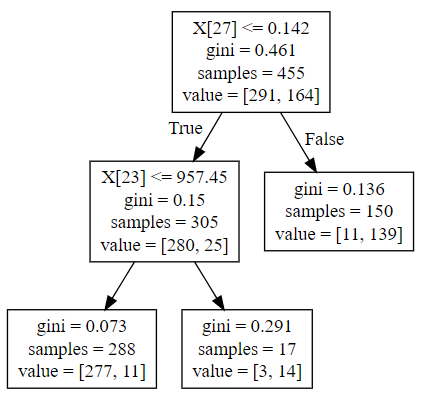

In [48]:
Image("Q3-2a.png")

In [45]:
best_classification('entropy').sort_values('test_accuracy', ascending = False).head(1)

,max_depth,min_sample_split,train_accuracy,test_accuracy
34,3.0,32.0,0.96044,0.982456


In [15]:
clf_entropy = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 32, criterion='entropy')
model = clf_entropy.fit(x_train, y_train)
with open("file_name2.dot", 'w') as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

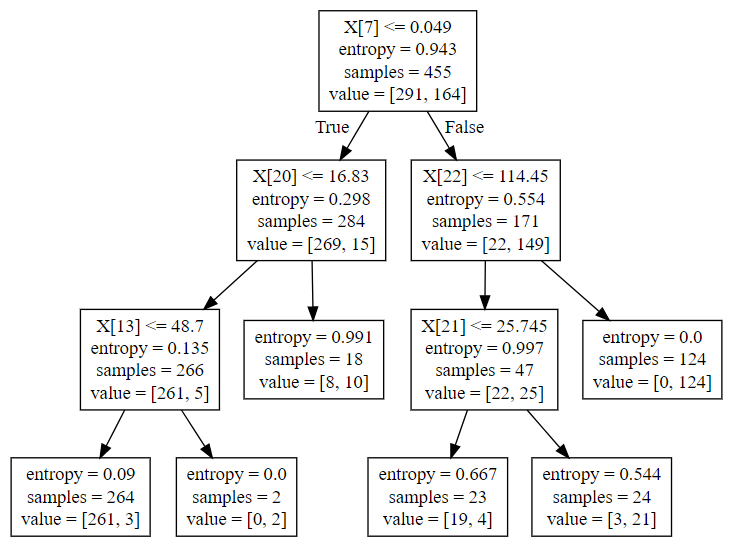

In [17]:
Image("Q3-2b.png")

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

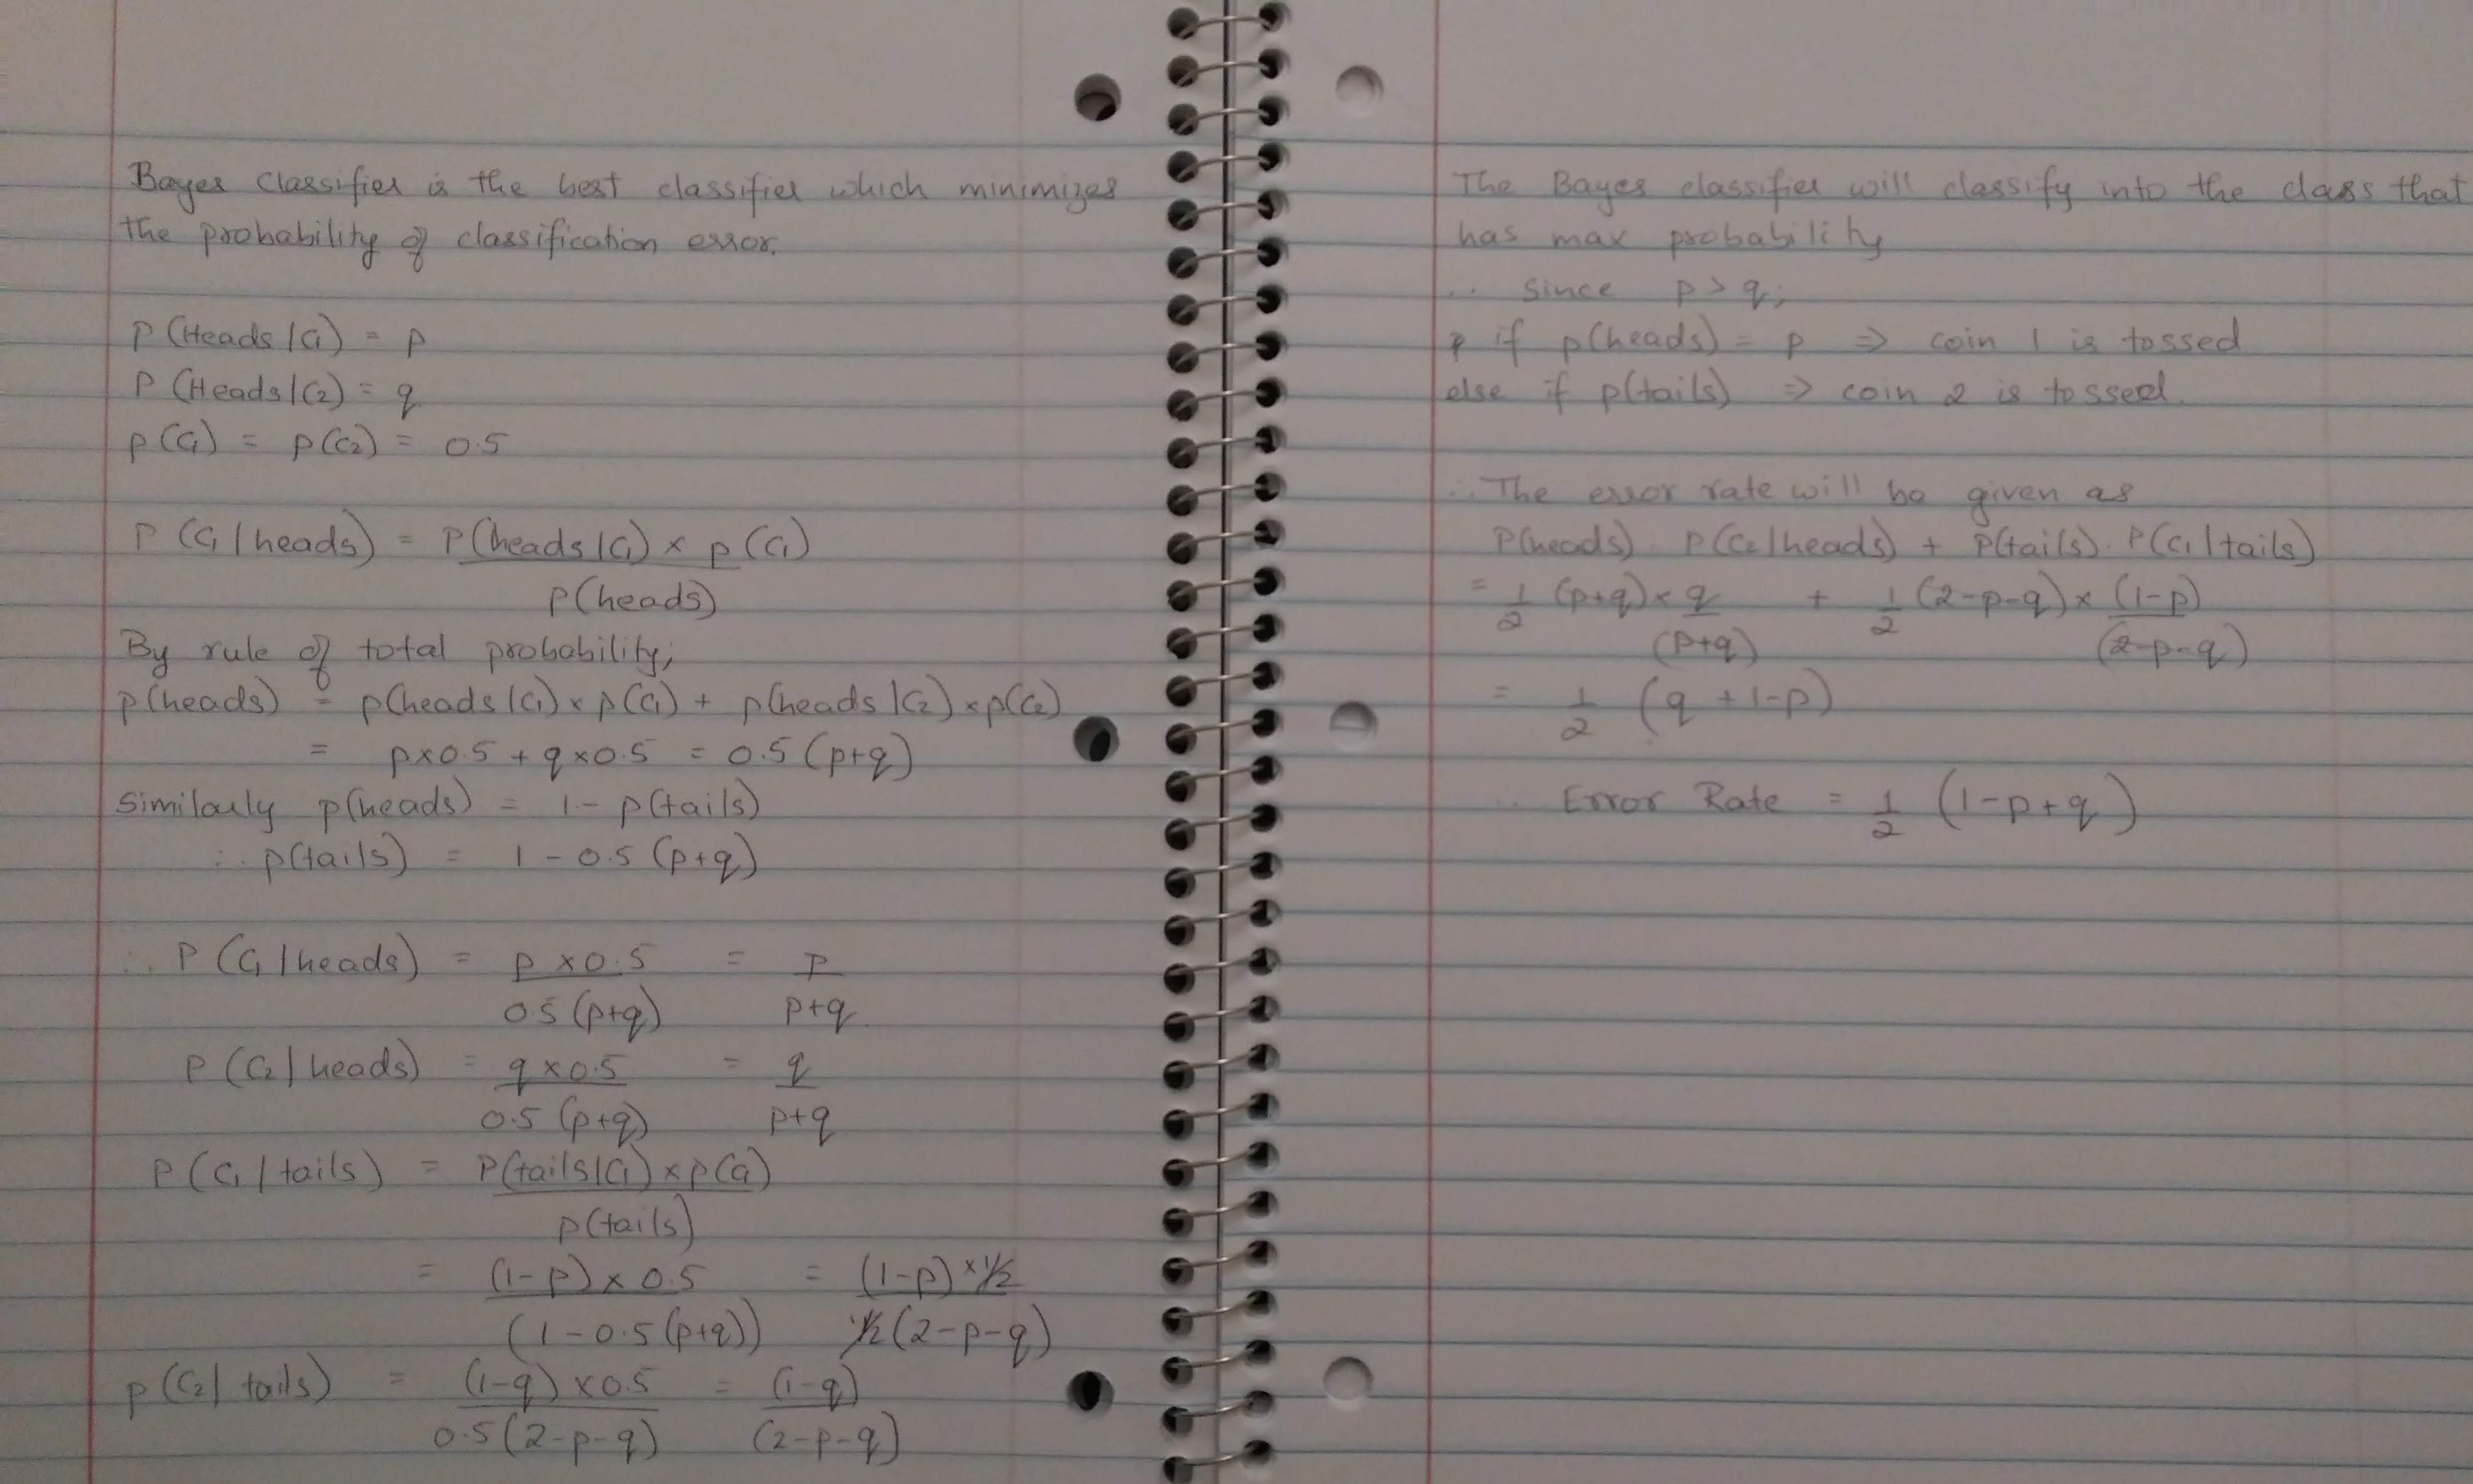

In [50]:
Image("Q4.jpg")